In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 24 14:29:31 2022

@author: samy
"""

import shap
from shap.plots import waterfall, beeswarm, text


import time
import copy
import pickle
import pickle5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import model_train as mt
from sklearn.tree import DecisionTreeClassifier 
import copy

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from transformers import (AdamW, 
                          get_linear_schedule_with_warmup,
                          set_seed)

def load_pickle(path_file):
    with open(path_file, 'rb') as file:
        data = pickle.load(file)
    return data

def load_pickle5(path_file):
    with open(path_file, 'rb') as file:
        data = pickle5.load(file)
    return data

# |||||||||||||||||||||||||||||||||||||||||||| INFLUENCER PELOSI - C ||||||||||||||||||||||||||||||||||||||||||||

# ############################ BERT x TEXT (TEST)

In [2]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/pelosi_inf/metis_label/bert_text/shap_temp_test.pickle'
shap_values, sample_X, sample_y = load_pickle(p)

   ---- (BERT) (TEST) mean ----


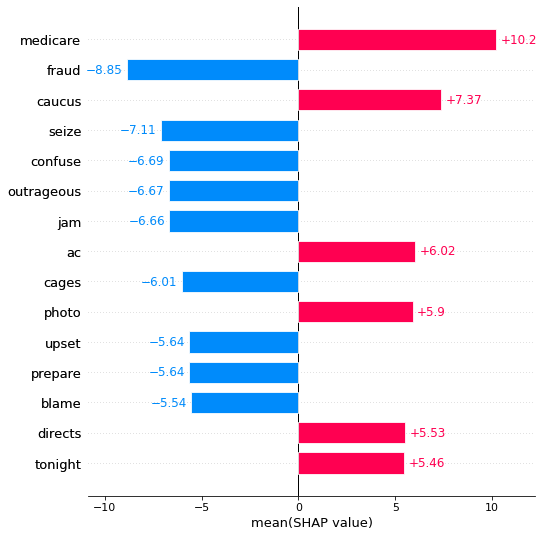

In [3]:
print('   ---- (BERT) (TEST) mean ----') #most common & most impact
shap.plots.bar(shap_values.mean(0), max_display=15, rm_last=True)

   ---- (BERT) (TEST) min (pro-trump) ----


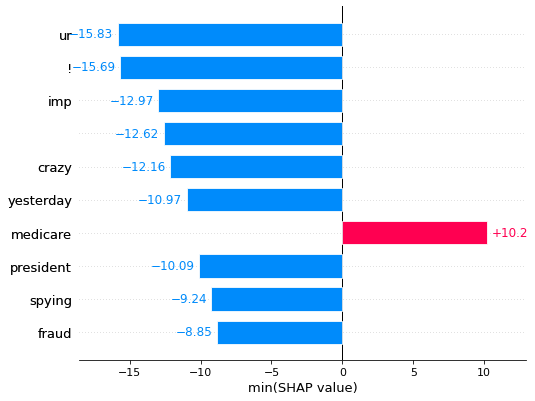

In [4]:
print('   ---- (BERT) (TEST) min (pro-trump) ----') #most common & most impact
shap.plots.bar(shap_values.min(0), rm_last=True)

   ---- (BERT) (TEST) max (pro-pelosi) ----


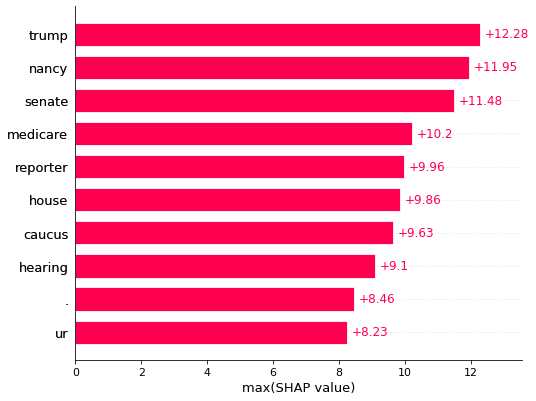

In [5]:
print('   ---- (BERT) (TEST) max (pro-pelosi) ----') #most common & most impact
shap.plots.bar(shap_values.max(0), order=shap.Explanation.identity, rm_last=True)

# ############################ BERT x TEXT (TRAIN)

In [6]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/pelosi_inf/metis_label/bert_text/shap_temp_train.pickle'
shap_valuesTR, sample_X, sample_y = load_pickle(p)

   ---- (BERT) (TRAIN) mean ----


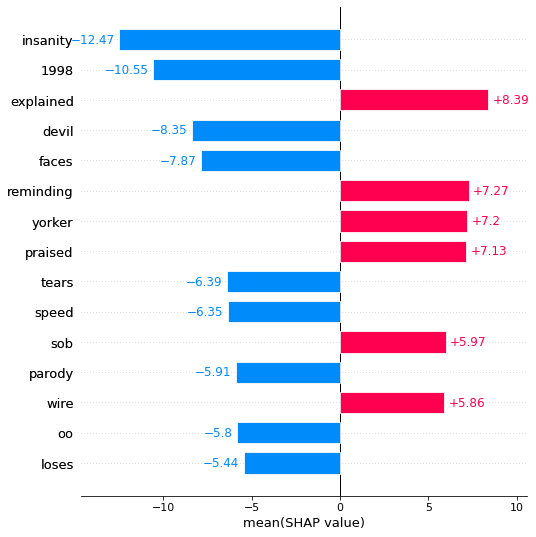

In [7]:
print('   ---- (BERT) (TRAIN) mean ----') #most common & most impact
shap.plots.bar(shap_valuesTR.mean(0), max_display=15, rm_last=True)

   ---- (BERT) (TRAIN) min (pro-trump) ----


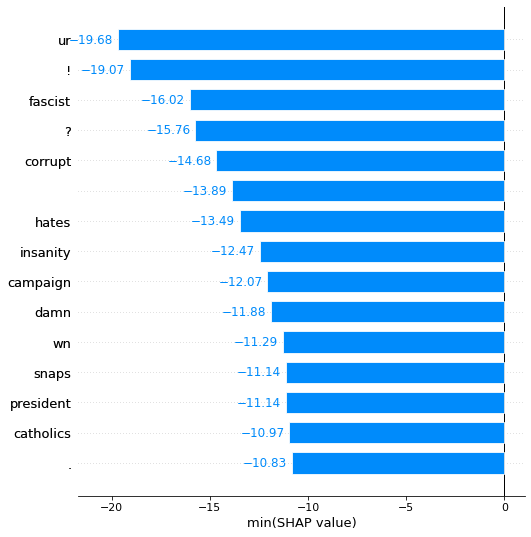

In [8]:
print('   ---- (BERT) (TRAIN) min (pro-trump) ----') #most common & most impact
shap.plots.bar(shap_valuesTR.min(0), max_display=15, rm_last=True)

   ---- (BERT) (TRAIN) max (pro_pelosi) ----


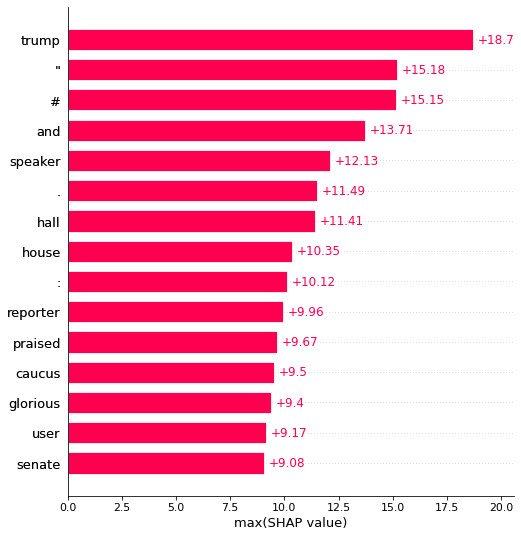

In [9]:
print('   ---- (BERT) (TRAIN) max (pro_pelosi) ----') #most common & most impact
shap.plots.bar(shap_valuesTR.max(0), order=shap.Explanation.identity, rm_last=True, max_display=15)

# ############################ RF x LIWC (TEST)

In [20]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/pelosi_inf/metis_label/random_forest_liwc/shap_test_ALL.pickle'
shap_valuesLIWC, shap_values, sample_X  = load_pickle(p)

   ---- (BERT) (TEST) (RF x LIWC) mean ----


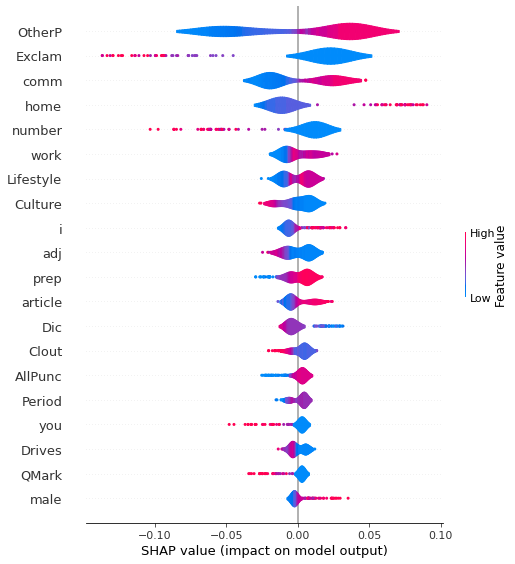

In [21]:
print('   ---- (BERT) (TEST) (RF x LIWC) mean ----') #most common & most impact
shap.summary_plot(shap_values[1], sample_X, plot_type='violin', title="test_set")

# ############################ RF x LIWC (TRAIN)

# -------------- SHAP

In [25]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/pelosi_inf/metis_label/random_forest_liwc/shap_train_ALL.pickle'
shap_valuesLIWC, shap_values, sample_X  = load_pickle(p)

   ---- (BERT) (TEST) (RF x LIWC) mean ----


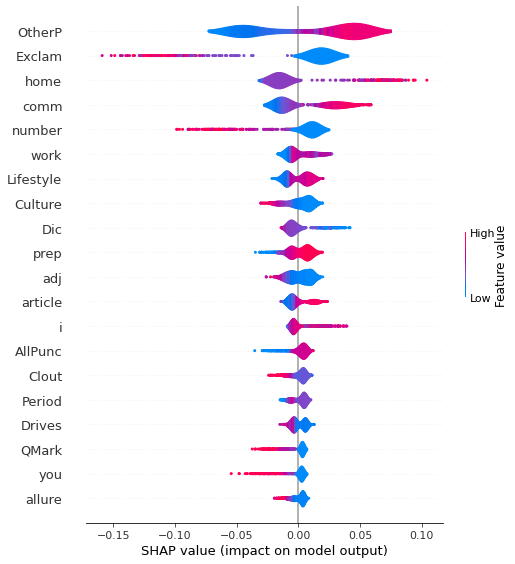

In [26]:
print('   ---- (BERT) (TEST) (RF x LIWC) mean ----') #most common & most impact
shap.summary_plot(shap_values[1], sample_X, plot_type='violin', title="train_set")

# -------------- FEATURE IMPORTANCE

In [27]:
import matplotlib.pyplot as plt
LIWC_FEATURES = ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron',
                 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 
                 'verb', 'adj', 'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition', 'allnone', 'cogproc', 'insight', 
                 'cause', 'discrep', 'tentat', 'certitude', 'differ', 'memory', 'Affect', 'tone_pos', 'tone_neg', 'emotion', 'emo_pos', 
                 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'swear', 'Social', 'socbehav', 'prosocial', 'polite', 'conflict', 'moral', 
                 'comm', 'socrefs', 'family', 'friend', 'female', 'male', 'Culture', 'politic', 'ethnicity', 'tech', 'Lifestyle', 'leisure', 
                 'home', 'work', 'money', 'relig', 'Physical', 'health', 'illness', 'wellness', 'mental', 'substances', 'sexual', 'food', 'death',
                 'need', 'want', 'acquire', 'lack', 'fulfill', 'fatigue', 'reward', 'risk', 'curiosity', 'allure', 'Perception', 'attention', 
                 'motion', 'space', 'visual', 'auditory', 'feeling', 'time', 'focuspast', 'focuspresent', 'focusfuture', 'Conversation', 'netspeak', 
                 'assent', 'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'QMark', 'Exclam', 'Apostro', 'OtherP']
temp_path = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/pelosi_inf/metis_label/random_forest_liwc/random_forest_liwc.pickle'
importance, clf = load_pickle(temp_path)

Text(0.5, 0, 'RF x LIWC Feature Importance')

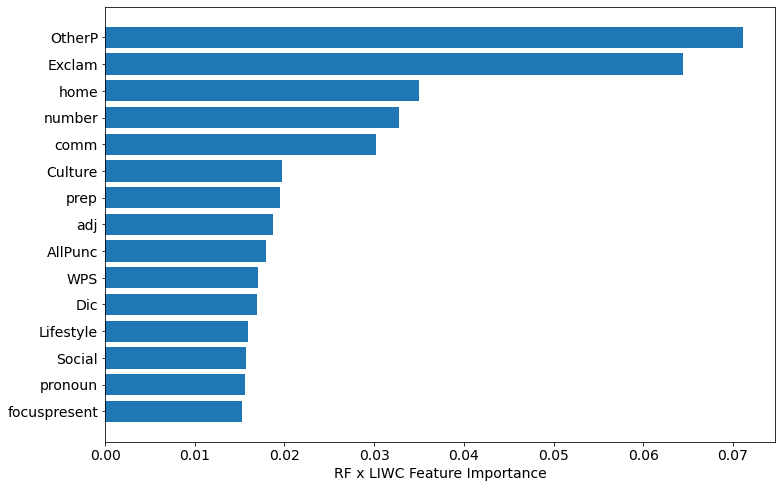

In [28]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

sorted_idx = clf.feature_importances_.argsort()
sorted_idx = sorted_idx[len(sorted_idx)-15:]

feats = np.array(LIWC_FEATURES)
plt.barh(feats[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("RF x LIWC Feature Importance")